In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.VERSION, tf.keras.__version__

('1.13.1', '2.2.4-tf')

# Creating a Neural Network

### Load a dataset from Keras

In [3]:
# loading a dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# make a list of the class names because the dataset uses numbers as the training labels
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
# the training labels are numbers; 
# the index position of the class names corresponds with the number of the train_labels
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

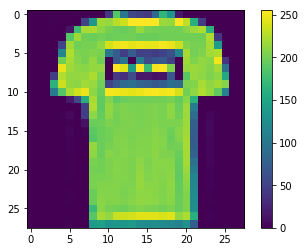

In [6]:
# preview one of the images
plt.figure
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# display the image in its raw array form
train_images[1]

# 0 = black, 255 = white

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [8]:
# normalize the values to be between 0 and 1; min-max normailzation

train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
# display the image with its normalized values (between 0 and 1)
train_images[1]

# 0 = black, 1 = white

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

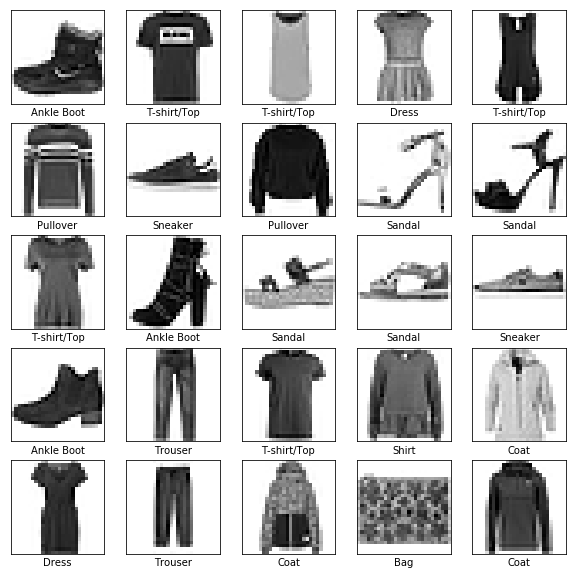

In [10]:
# view some of the grayscale images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


### Create a Neural Network

In [11]:
# create a neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# compile the model with chosen parameters

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the Neural Network

In [14]:
# train the model usin the train_images
model.fit(train_images, train_labels, epochs=1)

60000/60000 [==============================] - 9s 150us/sample - loss: 0.2806 - acc: 0.8969


# Exercises
Experiment with different models and see how the accuracy results differ. For example, you can try some of the following modifications:

Set training epochs to 1, 10, etc.

Modify the number of neurons in the Dense layer following the Flatten layer. Try numbers as low as 10 and as high as 512 and see how the accuracy changes.

Add additional Dense layers between the Flatten and the final Dense (output) layer, and experiment with different numbers of neurons in the layers.

Don't normalize the pixel values, and see what effect it has.

### Evaluate the accuracy of the trained model

In [15]:
# use the test images to evaluate the model on a set of unseen images
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.3679 - acc: 0.8681


In [16]:
print("Test accuracy: ", test_acc)

Test accuracy:  0.8681


### Evaluate some predictions

In [17]:
# get actual predictions for the test_images
predictions = model.predict(test_images)

In [18]:
# preview some of the test_images labels
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [19]:
# view the prediction for a selected test_image
predictions[9]

array([3.8147526e-08, 1.0920427e-08, 2.9018839e-08, 3.4074597e-07,
       1.2260708e-08, 5.7419758e-05, 2.9212652e-08, 9.9991930e-01,
       1.8895369e-06, 2.0901618e-05], dtype=float32)

In [20]:
# sort the probabilities (from least likely class to the most likely class)
np.argsort(predictions[9])

array([1, 4, 2, 6, 0, 3, 8, 9, 5, 7], dtype=int64)

In [21]:
# you can reverse the order to view the class probabilities from best to work
np.argsort(predictions[9])[::-1]

array([7, 5, 9, 8, 3, 0, 6, 2, 4, 1], dtype=int64)

In [22]:
# display the class number with the highest probability
np.argmax(predictions[9])

7

In [23]:
# display the class name with the highest probability; the class name with the index position of the prediction
class_selection = np.argmax(predictions[9])
class_names[class_selection]

'Sneaker'

### Use the trained model to make a prediction on a single (new) image 

In [24]:
# Make a prediction on a single (new) image
# Grab an image. Here we'll select one from our test_images.

img = test_images[0]
img.shape

(28, 28)

In [25]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# So, even though we're using a single image, we need to add it to a batch of one.

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,axis=0))
img.shape

(1, 28, 28)

In [28]:
# use the trained model to predict the class that the image belongs to
single_prediction = model.predict(img)
print(single_prediction[0])

[3.9273971e-07 4.7155466e-09 3.8471649e-07 1.9041787e-08 3.1090764e-07
 4.0337970e-03 3.1478608e-06 2.1631323e-01 6.3199495e-06 7.7964234e-01]


In [29]:
# display the prediction
classification = np.argmax(single_prediction[0])
class_name = class_names[classification]
                           
print("The predicted class label is {}: {}".format(classification, class_name))

The predicted class label is 9: Ankle Boot


In [30]:
# display the correct label
print("The true class label is {}: {}".format(test_labels[0], class_names[test_labels[0]]))

The true class label is 9: Ankle Boot
